<a href="https://colab.research.google.com/github/AbuKashan/Titanic-Data-set-/blob/main/Copy_of_titanic_data_set_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import load_dataset
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission (2).csv
Saving test.csv to test (2).csv
Saving train.csv to train (2).csv


In [ ]:
import io
df= pd.read_csv(io.BytesIO(uploaded['gender_submission.csv']))

In [ ]:
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [ ]:
df.shape

(418, 2)

In [ ]:
df1=pd.read_csv('test.csv')

In [ ]:
df2=pd.read_csv('train.csv')

In [ ]:
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df1.shape

(418, 11)

In [ ]:
df2.shape

(891, 12)

In [ ]:
df2.corr()['Survived'].sort_values()

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

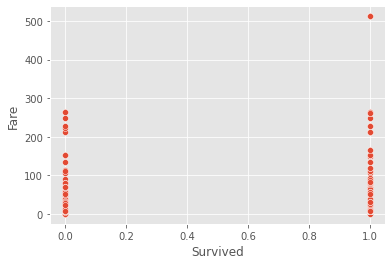

In [ ]:
sns.scatterplot(data=df2,x='Survived',y='Fare')

In [ ]:
df2[(df2['Fare']>400)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [ ]:
index_drop=df2[(df2['Fare']>400)].index
df2=df2.drop(index_drop,axis=0)

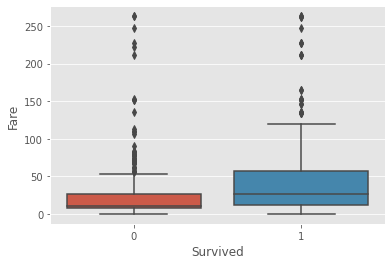

In [ ]:
sns.boxplot(data=df2,x='Survived',y='Fare')


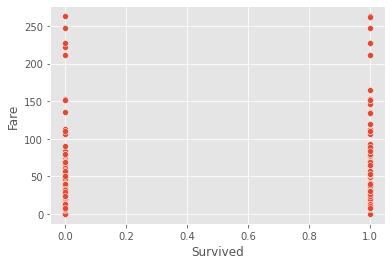

In [ ]:
sns.scatterplot(data=df2,x='Survived',y='Fare')

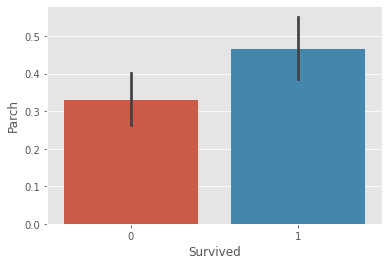

In [ ]:
sns.barplot(data=df2,x='Survived',y='Parch')

In [ ]:
df2.isnull().sum()/len(df2)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.932432
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.252252
Embarked        0.225225
dtype: float64

In [ ]:
def missing_data(df2):
    nan_percentag=df2.isnull().sum()/len(df2)*100
    nan_percentag=nan_percentag[nan_percentag>0].sort_values()
    return nan_percentag

In [ ]:
nan_percentag=missing_data(df2)

In [ ]:
nan_percentag


Embarked     0.225225
Age         19.932432
Cabin       77.252252
dtype: float64

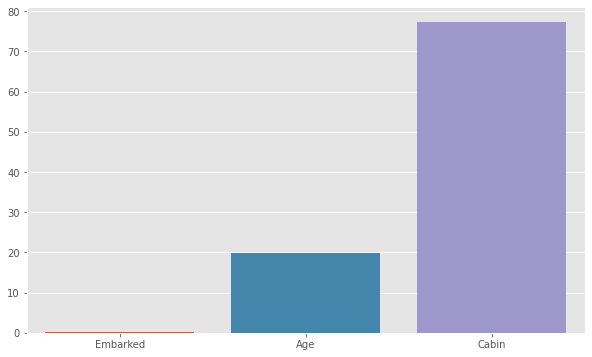

In [ ]:
nan_percentag=missing_data(df2)
plt.figure(figsize=(10,6))
sns.barplot(x=nan_percentag.index,y=nan_percentag)

In [ ]:
df2[df2['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
df2=df2.dropna(axis=0,how='any',subset=['Embarked'])

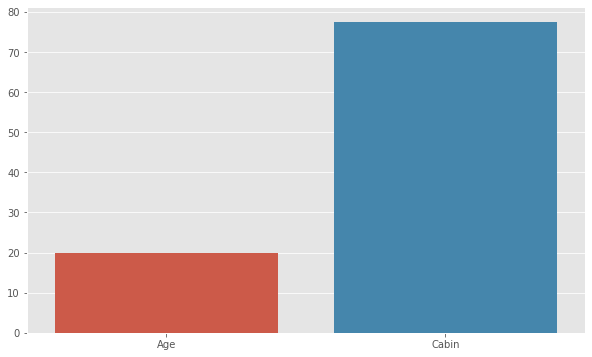

In [ ]:
nan_percentag=missing_data(df2)
plt.figure(figsize=(10,6))
sns.barplot(x=nan_percentag.index,y=nan_percentag)

In [ ]:
df2=df2.drop(['Cabin'],axis=1)

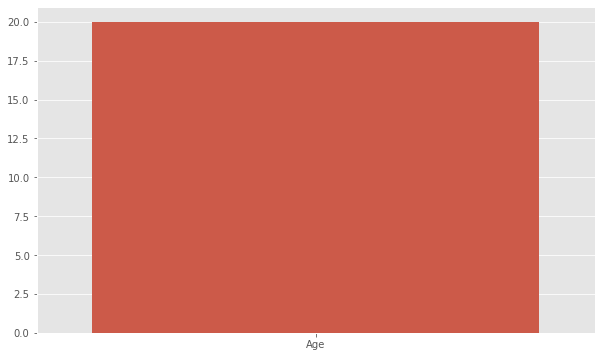

In [ ]:
nan_percentag=missing_data(df2)
plt.figure(figsize=(10,6))
sns.barplot(x=nan_percentag.index,y=nan_percentag)

In [ ]:
df2['Age'].fillna(df2['Age'].mean(),inplace=True)

In [ ]:
nan_percentag

Age    19.977427
dtype: float64

In [ ]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df2.drop(['PassengerId','Name','Ticket','Embarked'],axis=1,inplace=True)

In [ ]:
df2['Sex']=df2['Sex'].replace({'male':0,'female':1})

In [ ]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [ ]:
df2.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [ ]:
x=df2.drop(['Survived'],axis=1)
y=df2['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_model=StandardScaler()
standard_model.fit(x_train)

StandardScaler()

In [ ]:
scaler_x_train=standard_model.transform(x_train)
scaler_x_test=standard_model.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(scaler_x_train,y_train)

LogisticRegression()

In [ ]:
log_model.coef_

array([[-0.91571734,  1.33504392, -0.45500851, -0.43096045, -0.06165733,
         0.03372627]])

In [ ]:
y_pred=log_model.predict(scaler_x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [ ]:
accuracy_score(y_test,y_pred)

0.7640449438202247

In [ ]:
confusion_matrix(y_test,y_pred)

array([[49,  8],
       [13, 19]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


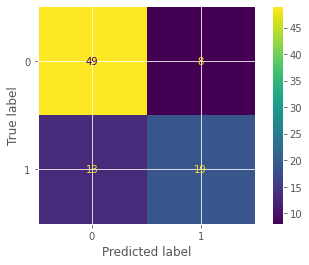

In [ ]:
plot_confusion_matrix(log_model,scaler_x_test,y_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        57
           1       0.70      0.59      0.64        32

    accuracy                           0.76        89
   macro avg       0.75      0.73      0.73        89
weighted avg       0.76      0.76      0.76        89



In [ ]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


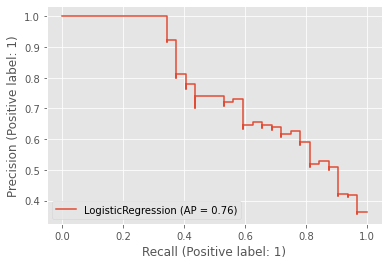

In [ ]:
plot_precision_recall_curve(log_model,scaler_x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


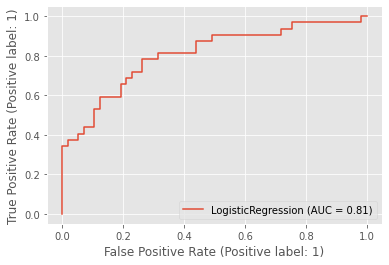

In [ ]:
plot_roc_curve(log_model,scaler_x_test,y_test)